In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [50]:
df=df.drop(["Timestamp", "Country", "state", "comments"], axis=1)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [51]:
def visualize(df, string):
    col=string
    ct= df[col].value_counts(dropna=False).sort_index()
    print("Frequency of each value:\n", ct)
    nan=df[col].isna().sum() 
    print("Number of null values:", nan)
    plt.figure(figsize=(8, 8))
    plt.pie(ct, labels=ct.index, autopct='%1.1f%%', startangle=0)
    plt.title(col)
    plt.show()
    grouped_data = df.groupby([string, 'treatment']).size().unstack(fill_value=0)
    # Calculate proportions
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    # Set the figure size using plt.subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    # Plotting
    proportions.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel(string)
    plt.ylabel('Proportion')
    plt.title('Proportion of Yes/No in Treatment')
    plt.legend(title='Treatment', bbox_to_anchor=(1, 1))
    plt.show()

Frequency of each value:
 -1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329 

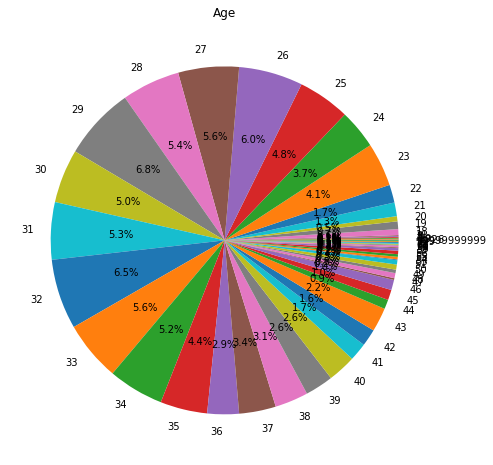

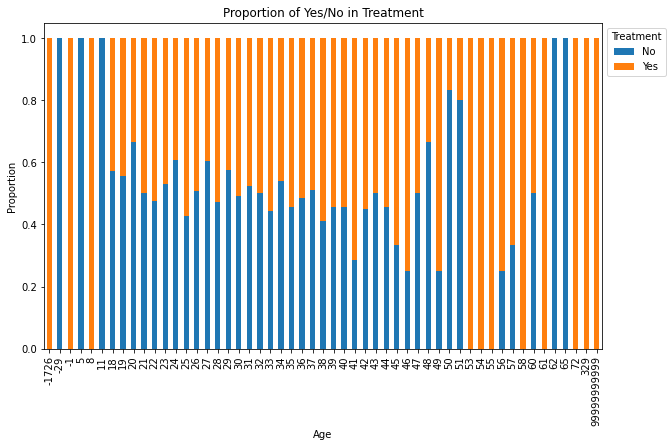

In [52]:
visualize(df, 'Age')

Frequency of each value:
 18     7
19     9
20     6
21    16
22    21
23    51
24    46
25    61
26    75
27    71
28    68
29    85
30    63
31    67
32    82
33    70
34    65
35    55
36    37
37    43
38    39
39    33
40    33
41    21
42    20
43    28
44    11
45    12
46    12
47     2
48     6
49     4
50     6
51     5
53     1
54     3
55     3
56     4
57     3
58     1
60     2
61     1
62     1
65     1
72     1
Name: Age, dtype: int64
Number of null values: 0


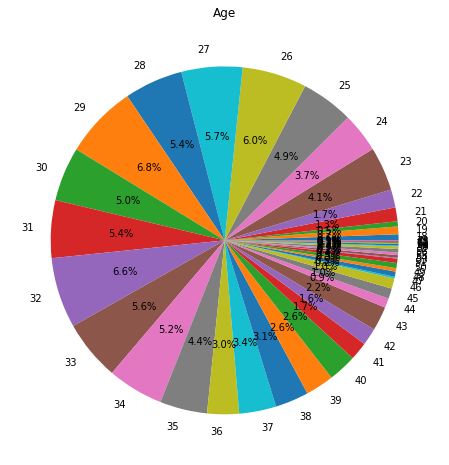

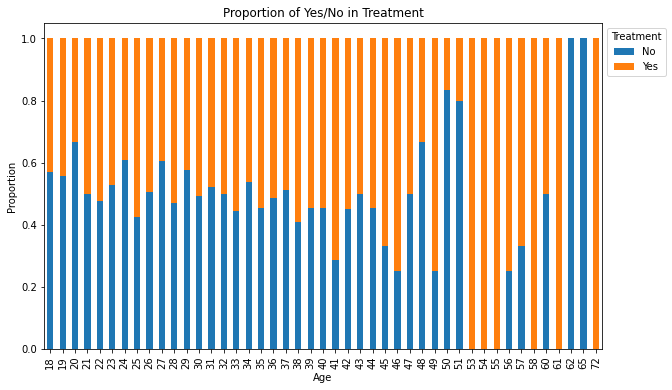

In [53]:
df= df[(df['Age'] >= 18) & (df['Age'] <= 100)]
visualize(df, 'Age')

First Quartile (Q1): 27.0
Median (Q2): 31.0
Third Quartile (Q3): 36.0


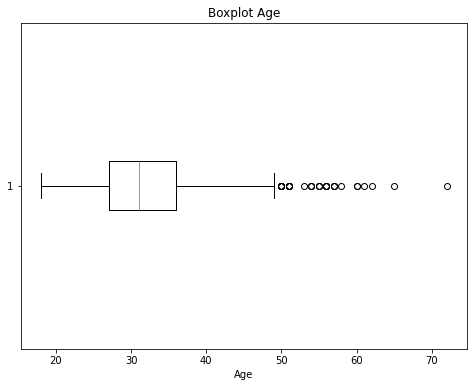

In [54]:
quartiles = np.percentile(df['Age'].dropna(), [25, 50, 75])
print(f'First Quartile (Q1): {quartiles[0]}')
print(f'Median (Q2): {quartiles[1]}')
print(f'Third Quartile (Q3): {quartiles[2]}')
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna(), vert=False)  # Drop NaN values for plotting
plt.title('Boxplot Age')
plt.xlabel('Age')
plt.show()

In [55]:
df= df[(df['Age'] >= 18) & (df['Age'] <= 100)]
def encode_age(value):
    if value <=27:
        return 0
    elif 27< value <=31:
        return 1
    elif 31< value <=36:
        return 2
    elif value >36:
        return 3

df['Age'] = df['Age'].apply(encode_age)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,3,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,3,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,1,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,1,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,3,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


Frequency of each value:
 0    363
1    283
2    309
3    296
Name: Age, dtype: int64
Number of null values: 0


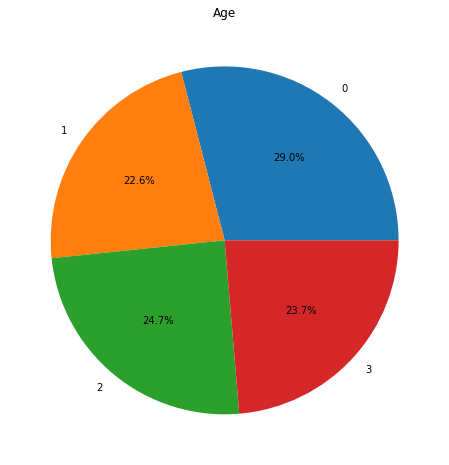

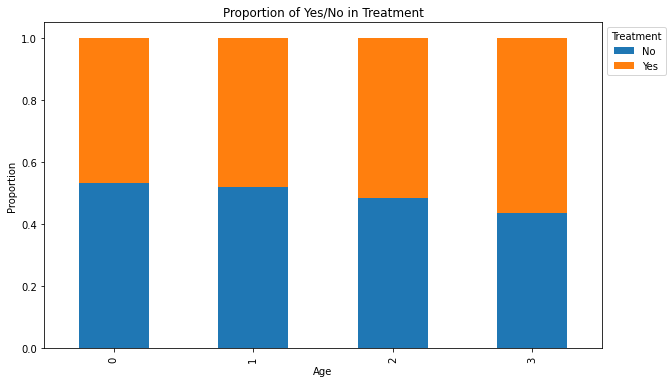

In [56]:
visualize(df, 'Age')

Frequency of each value:
 Agender                                             1
Androgyne                                           1
Cis Female                                          1
Cis Male                                            2
Cis Man                                             1
Enby                                                1
F                                                  38
Femake                                              1
Female                                            121
Female                                              2
Female (cis)                                        1
Female (trans)                                      2
Genderqueer                                         1
Guy (-ish) ^_^                                      1
M                                                 116
Mail                                                1
Make                                                4
Mal                                                 1
Ma

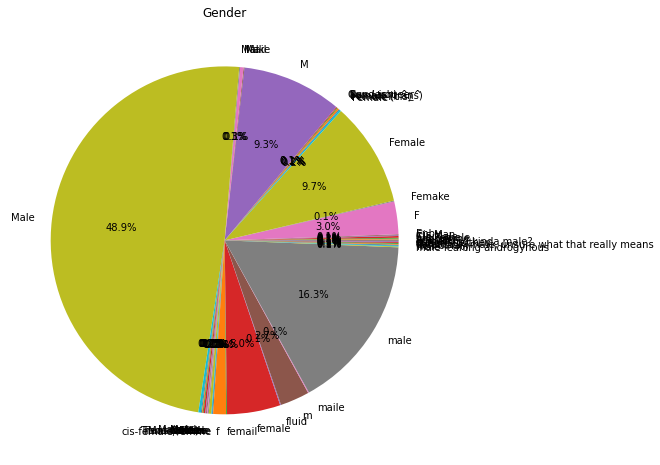

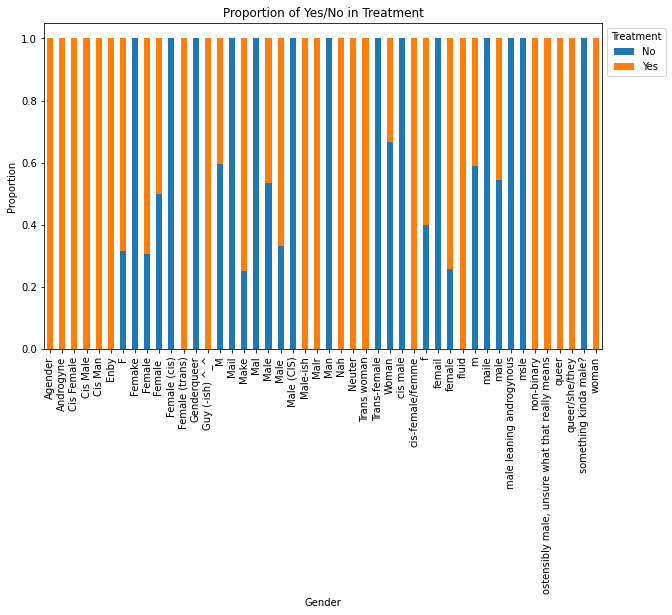

In [57]:
visualize(df, 'Gender')

In [58]:
df[~df['Gender'].isin(['p', 'A little about you'])]
def encode_gender(value):
    if pd.notna(value):
        value_lower = value.lower()
        if value_lower.startswith(('m', 'male', 'cis m')):
            return 0
        elif value_lower.startswith(('f', 'female', 'w', 'cis f')):
            return 1
    return 2

df['Gender'] = df['Gender'].apply(encode_gender)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,3,1,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,3,0,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2,0,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,1,0,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,1,0,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2,0,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2,0,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,3,1,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


Frequency of each value:
 0    987
1    249
2     15
Name: Gender, dtype: int64
Number of null values: 0


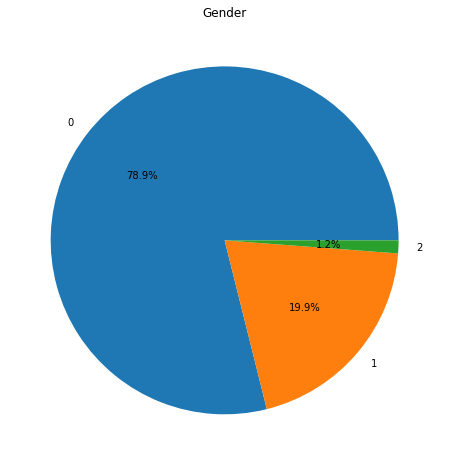

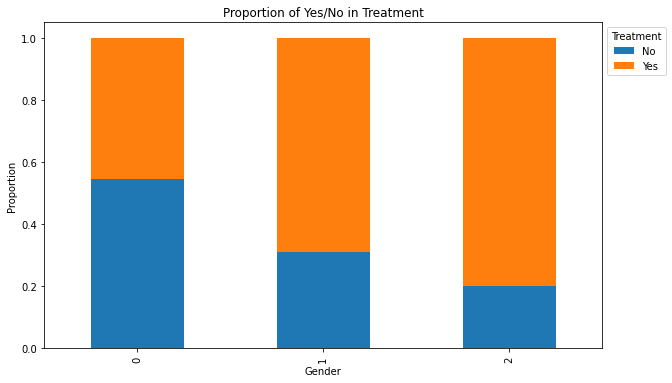

In [59]:
visualize(df, 'Gender')

Frequency of each value:
 No     1091
Yes     142
NaN      18
Name: self_employed, dtype: int64
Number of null values: 18


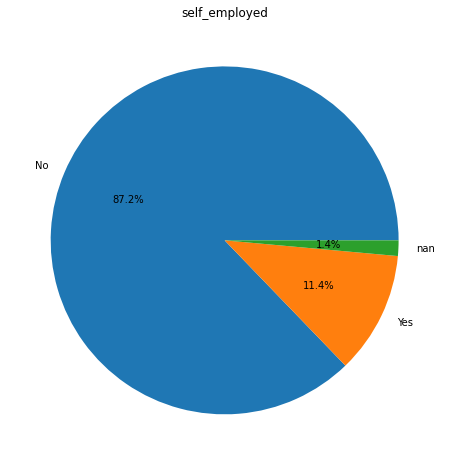

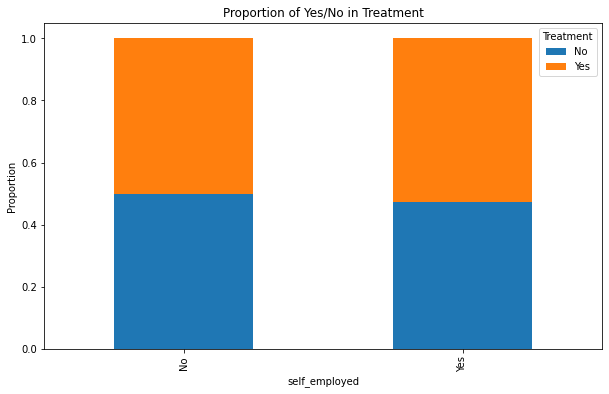

In [60]:
visualize(df, 'self_employed')

Frequency of each value:
 No     1109
Yes     142
Name: self_employed, dtype: int64
Number of null values: 0


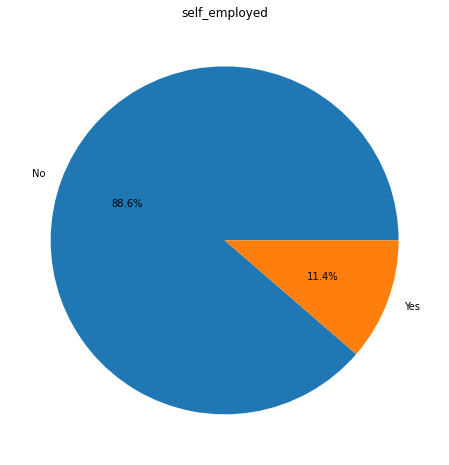

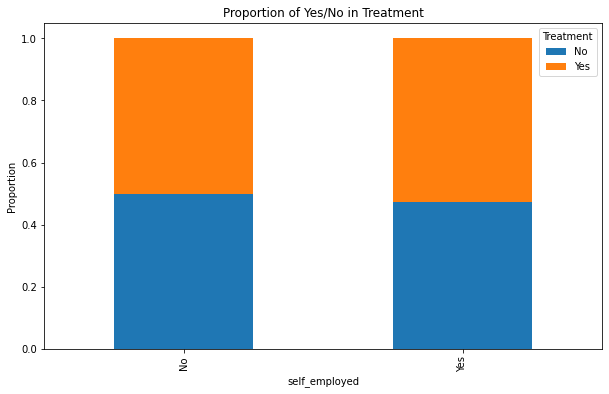

In [61]:
df['self_employed'].fillna('No', inplace=True)
visualize(df, 'self_employed')

Frequency of each value:
 No     762
Yes    489
Name: family_history, dtype: int64
Number of null values: 0


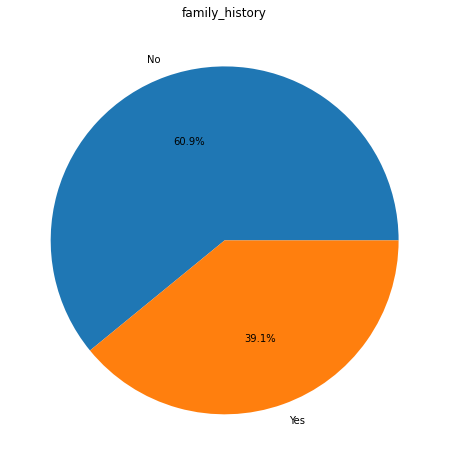

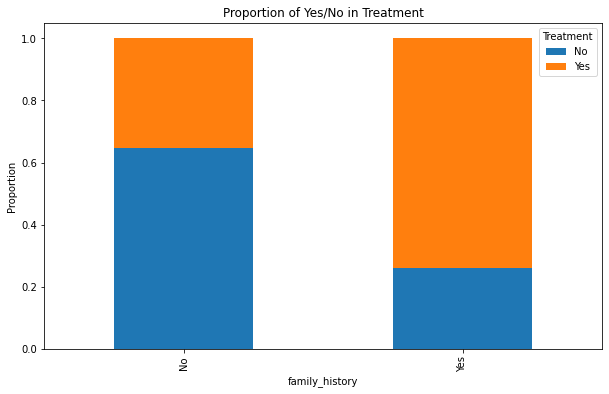

In [62]:
visualize(df, 'family_history')

Frequency of each value:
 No     619
Yes    632
Name: treatment, dtype: int64
Number of null values: 0


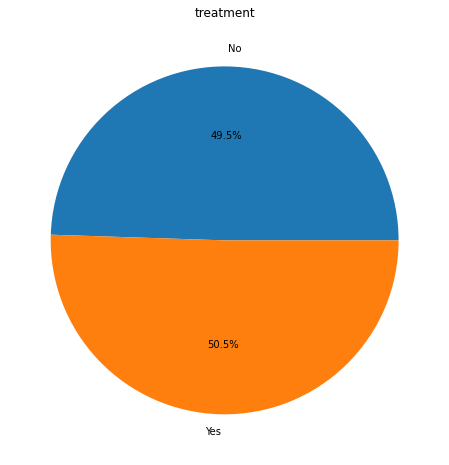

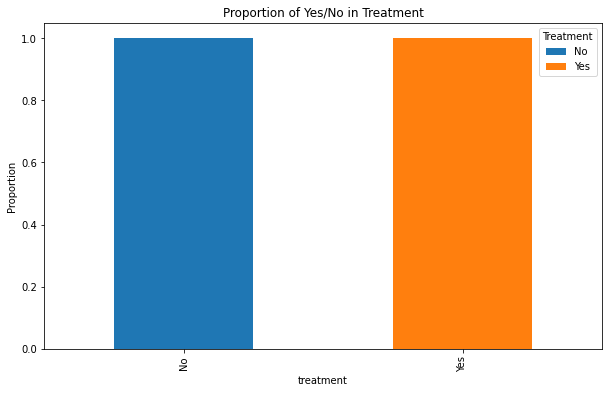

In [63]:
visualize(df, 'treatment')

Frequency of each value:
 Never        212
Often        140
Rarely       173
Sometimes    464
NaN          262
Name: work_interfere, dtype: int64
Number of null values: 262


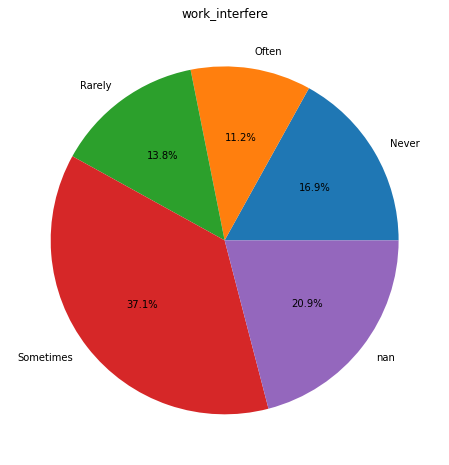

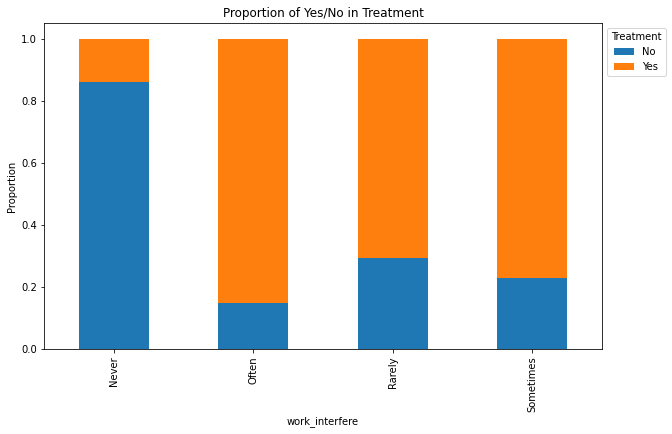

In [64]:
visualize(df, 'work_interfere')

Frequency of each value:
 Never        474
Often        140
Rarely       173
Sometimes    464
Name: work_interfere, dtype: int64
Number of null values: 0


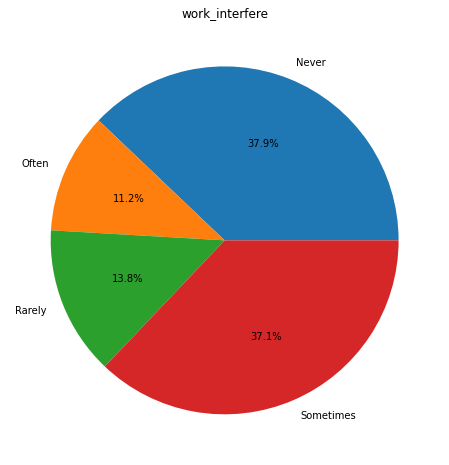

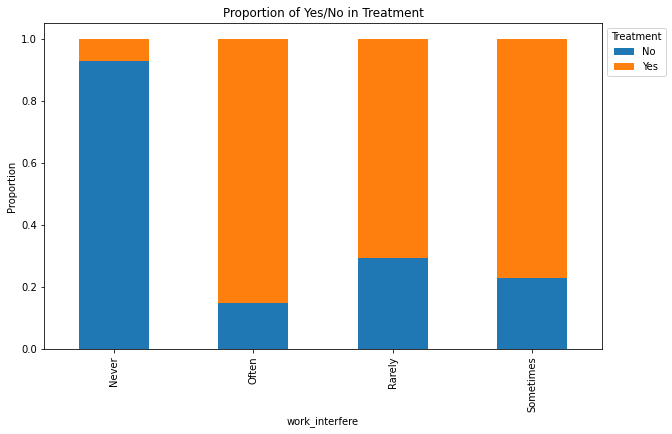

In [65]:
df['work_interfere'].fillna('Never', inplace=True)
visualize(df, 'work_interfere')

Frequency of each value:
 1-5               158
100-500           175
26-100            288
500-1000           60
6-25              289
More than 1000    281
Name: no_employees, dtype: int64
Number of null values: 0


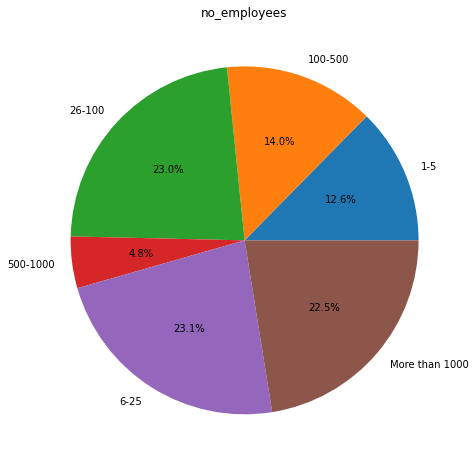

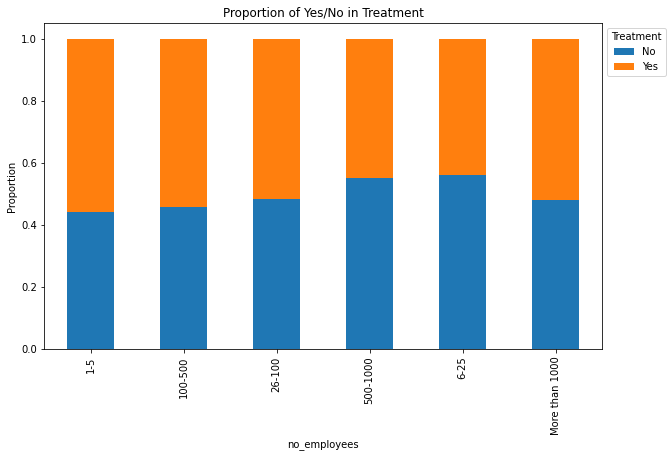

In [66]:
visualize(df, 'no_employees')

Frequency of each value:
 1-5               158
100-1000          235
26-100            288
6-25              289
More than 1000    281
Name: no_employees, dtype: int64
Number of null values: 0


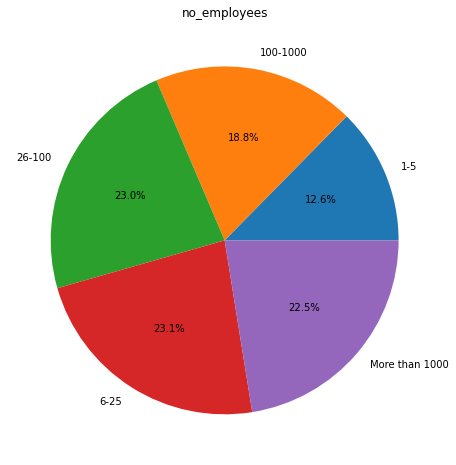

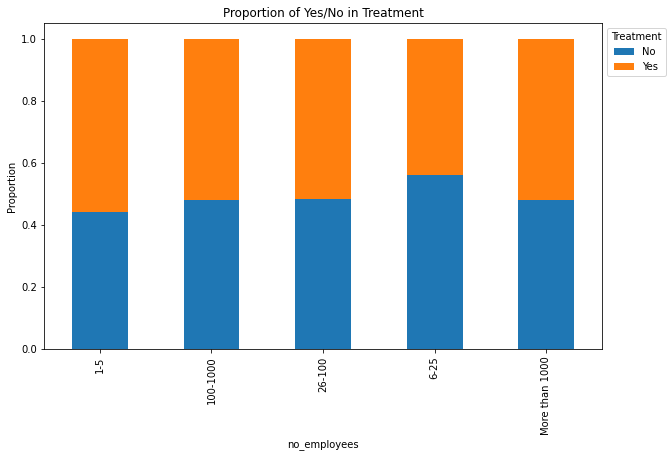

In [67]:
df['no_employees'].replace(to_replace='100-500', value='100-1000', inplace=True)
df['no_employees'].replace(to_replace='500-1000', value='100-1000', inplace=True)
visualize(df, 'no_employees')

Frequency of each value:
 No     880
Yes    371
Name: remote_work, dtype: int64
Number of null values: 0


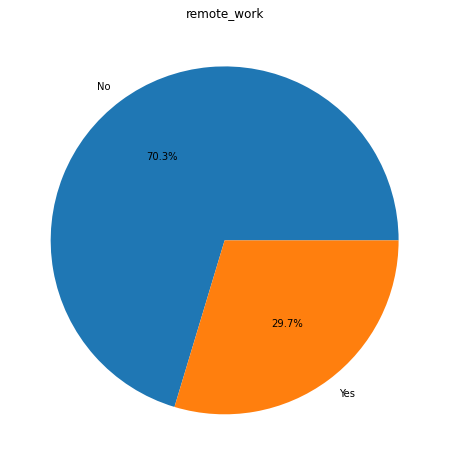

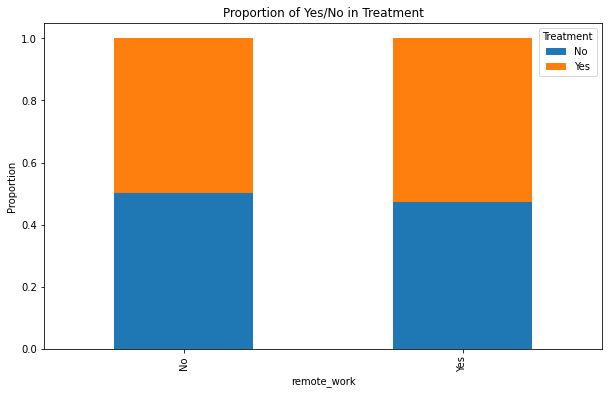

In [68]:
visualize(df, 'remote_work')

Frequency of each value:
 No      226
Yes    1025
Name: tech_company, dtype: int64
Number of null values: 0


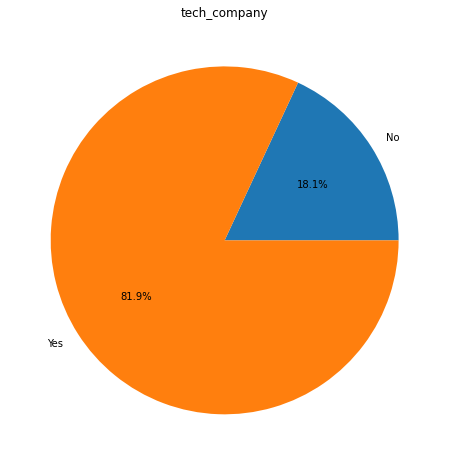

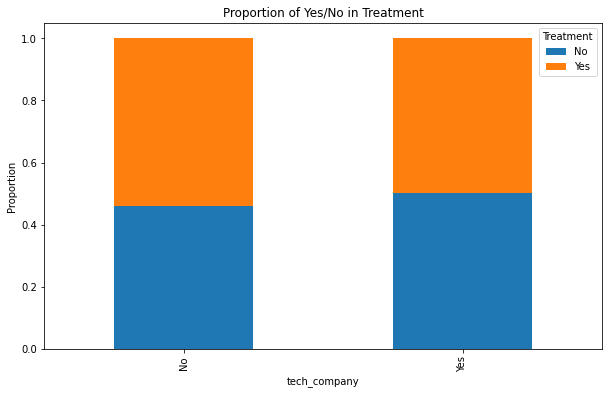

In [69]:
visualize(df, 'tech_company')

Frequency of each value:
 No     762
Yes    489
Name: family_history, dtype: int64
Number of null values: 0


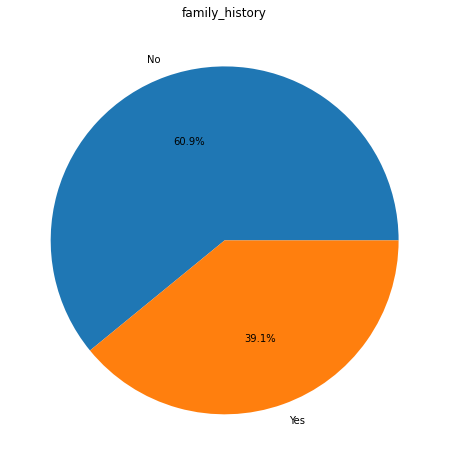

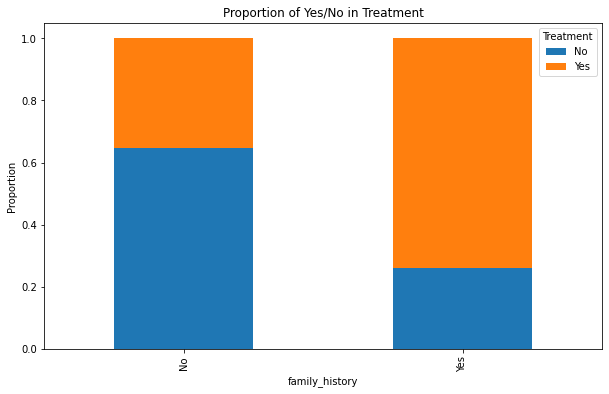

In [70]:
visualize(df, 'family_history')

Frequency of each value:
 Don't know    407
No            371
Yes           473
Name: benefits, dtype: int64
Number of null values: 0


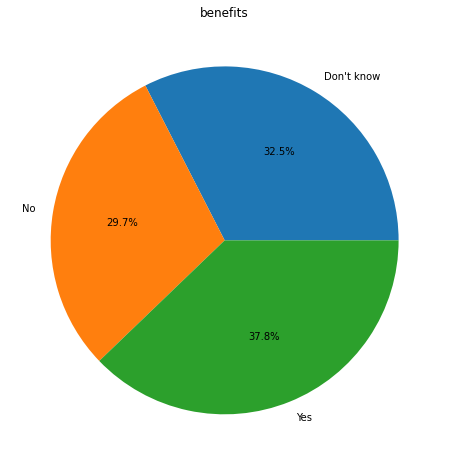

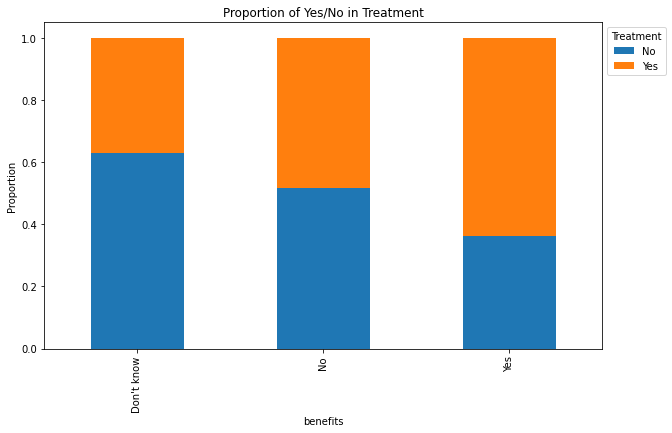

In [71]:
visualize(df, 'benefits')

Frequency of each value:
 No          499
Not sure    313
Yes         439
Name: care_options, dtype: int64
Number of null values: 0


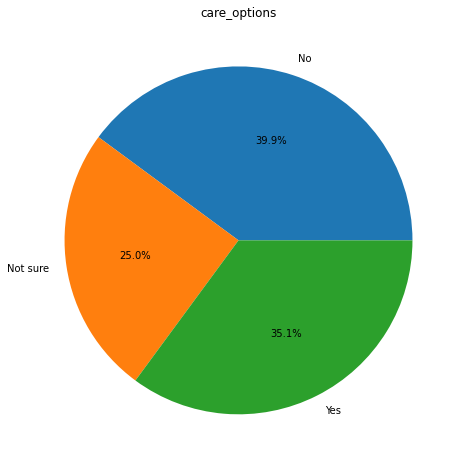

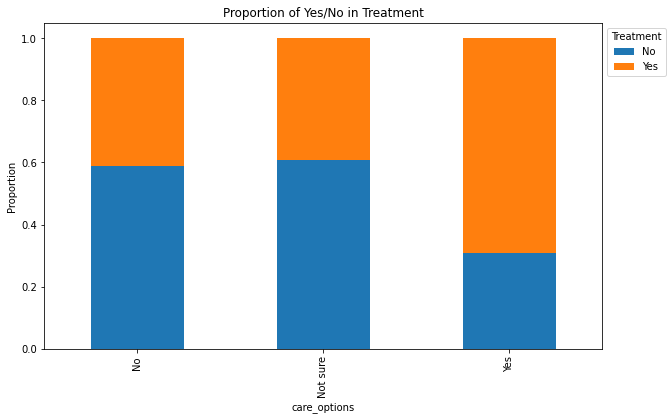

In [72]:
visualize(df, 'care_options')

Frequency of each value:
 Don't know    187
No            837
Yes           227
Name: wellness_program, dtype: int64
Number of null values: 0


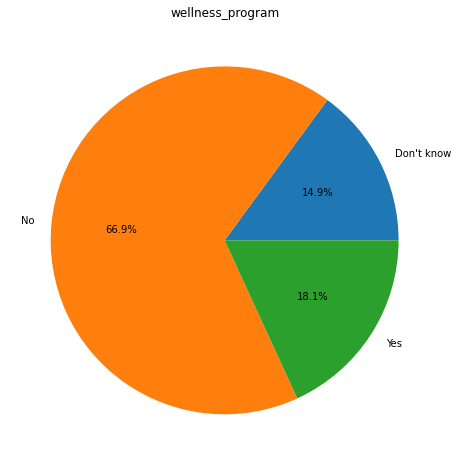

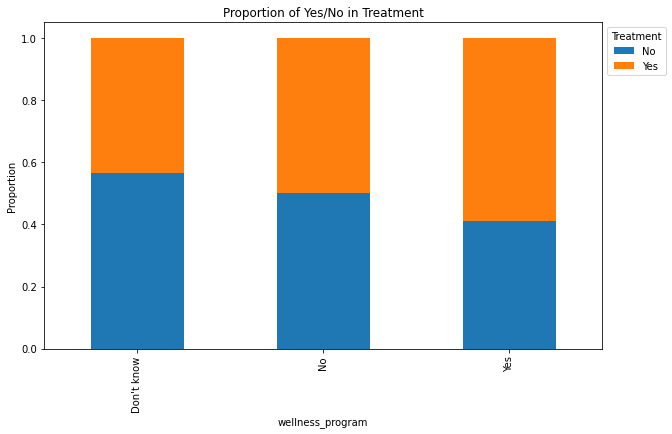

In [73]:
visualize(df, 'wellness_program')

Frequency of each value:
 Don't know    363
No            641
Yes           247
Name: seek_help, dtype: int64
Number of null values: 0


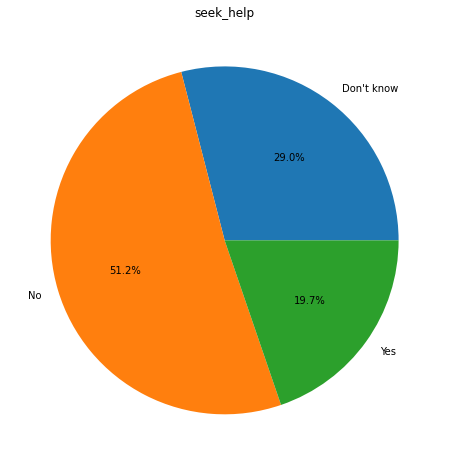

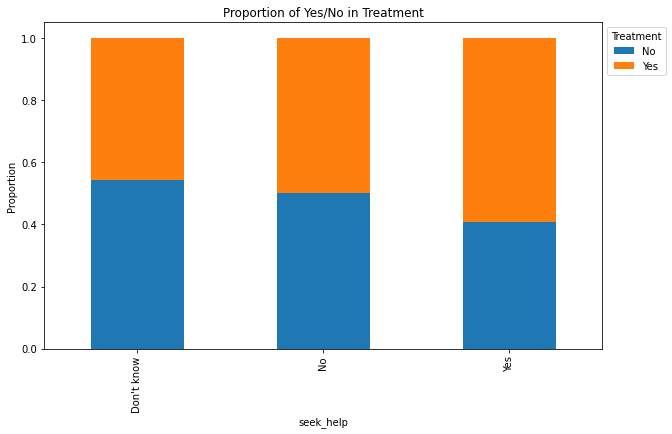

In [74]:
visualize(df, 'seek_help')

Frequency of each value:
 Don't know    815
No             64
Yes           372
Name: anonymity, dtype: int64
Number of null values: 0


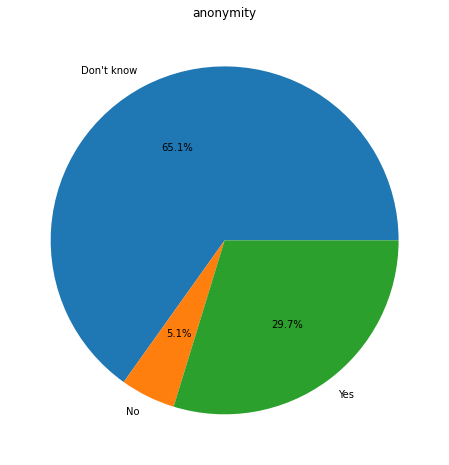

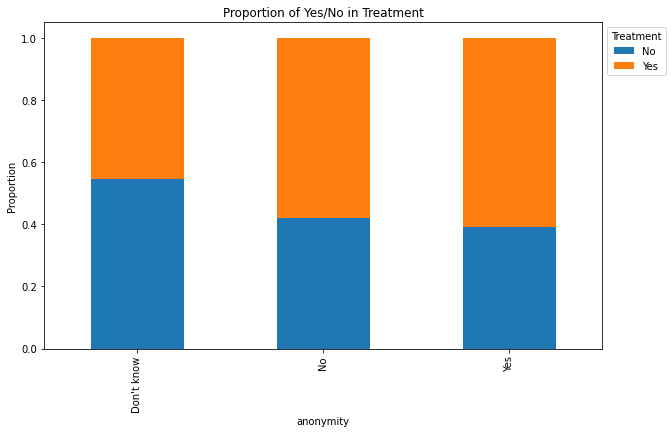

In [75]:
visualize(df, 'anonymity')

Frequency of each value:
 Don't know            561
Somewhat difficult    125
Somewhat easy         265
Very difficult         97
Very easy             203
Name: leave, dtype: int64
Number of null values: 0


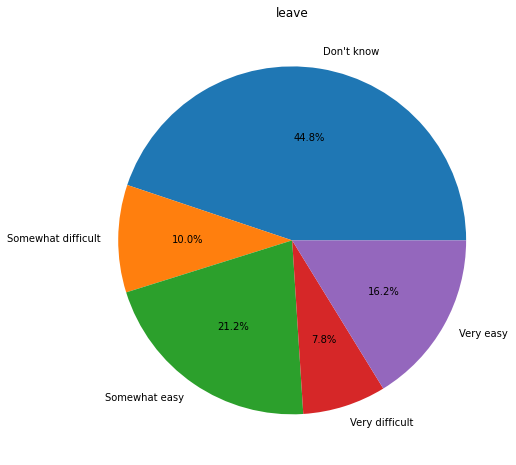

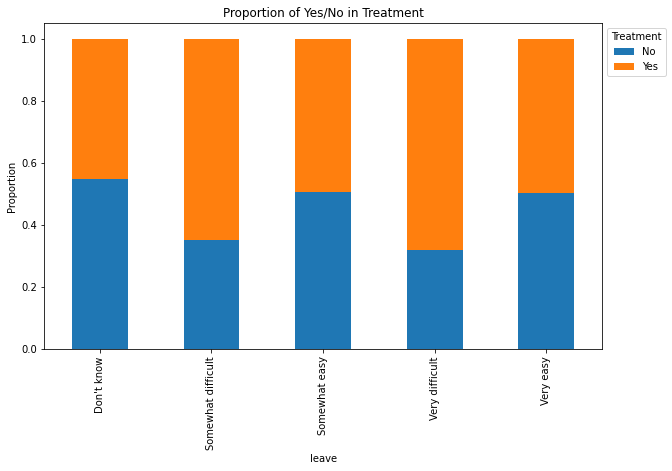

In [76]:
visualize(df, 'leave')

Frequency of each value:
 Maybe    476
No       487
Yes      288
Name: mental_health_consequence, dtype: int64
Number of null values: 0


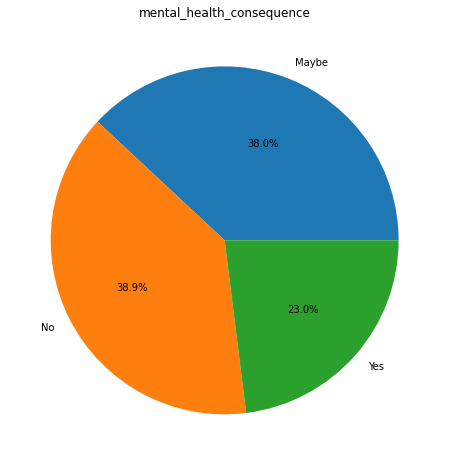

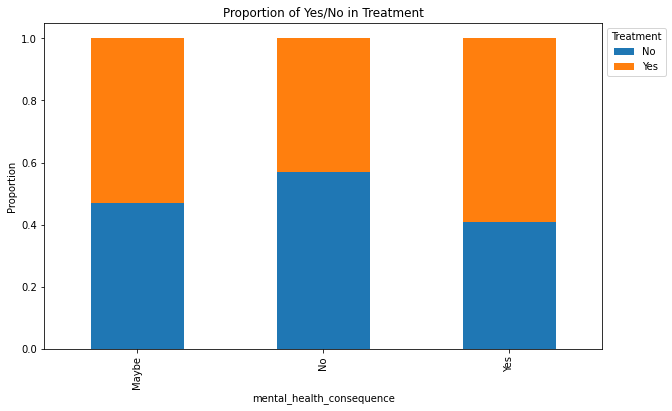

In [77]:
visualize(df, 'mental_health_consequence')

Frequency of each value:
 Maybe    273
No       920
Yes       58
Name: phys_health_consequence, dtype: int64
Number of null values: 0


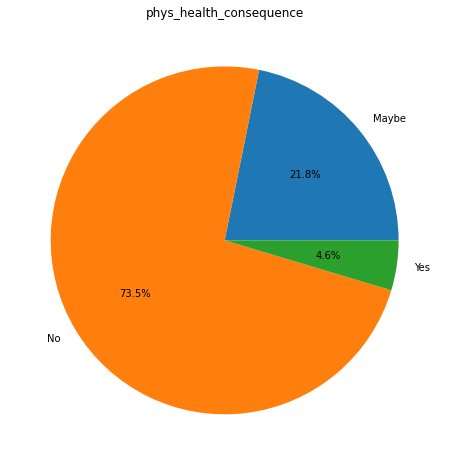

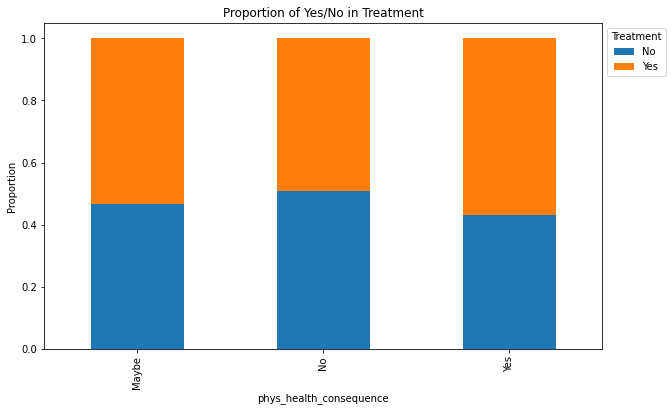

In [78]:
visualize(df, 'phys_health_consequence')

Frequency of each value:
 No              258
Some of them    771
Yes             222
Name: coworkers, dtype: int64
Number of null values: 0


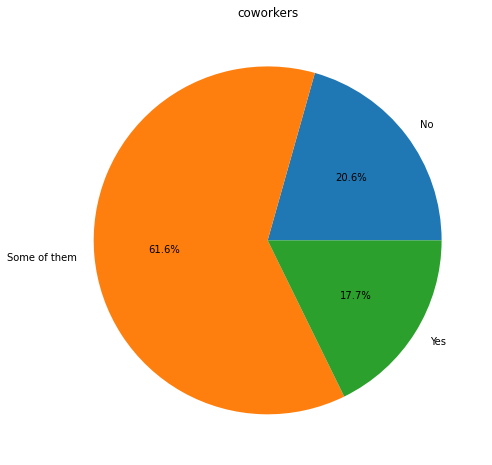

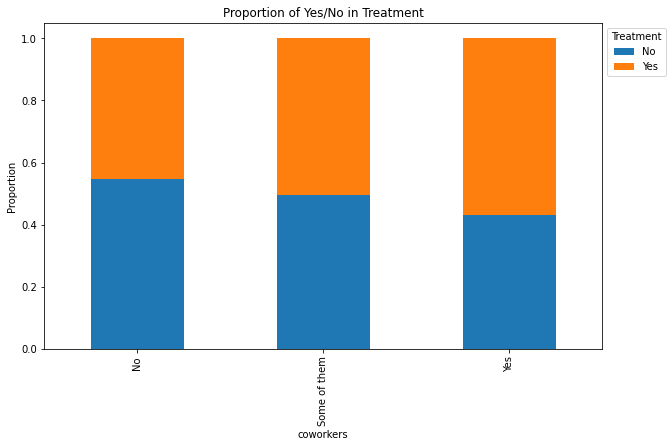

In [79]:
visualize(df, 'coworkers')

Frequency of each value:
 No              390
Some of them    349
Yes             512
Name: supervisor, dtype: int64
Number of null values: 0


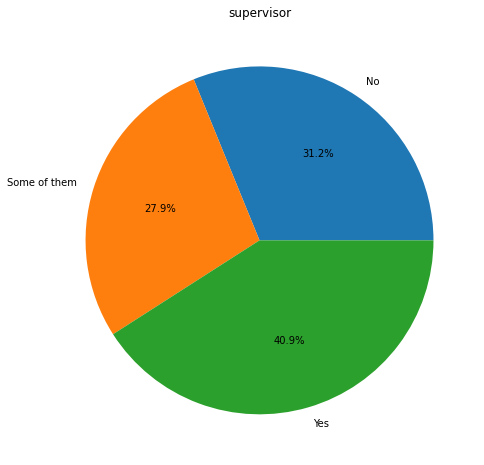

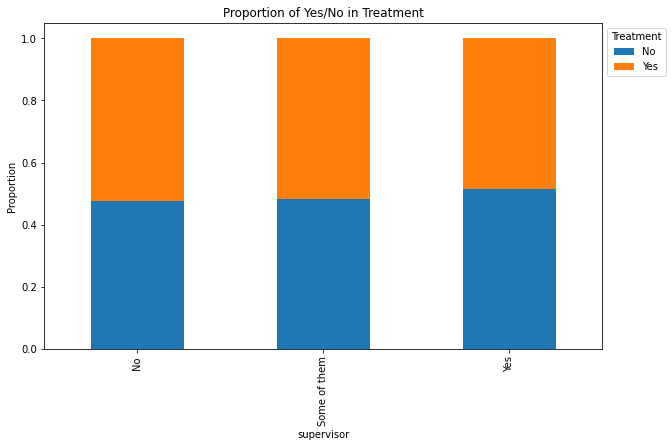

In [80]:
visualize(df, 'supervisor')

Frequency of each value:
 Maybe     207
No       1003
Yes        41
Name: mental_health_interview, dtype: int64
Number of null values: 0


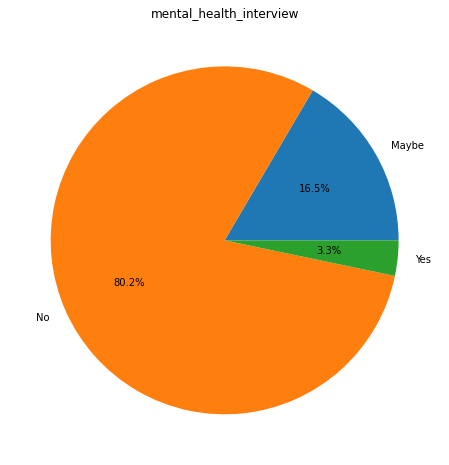

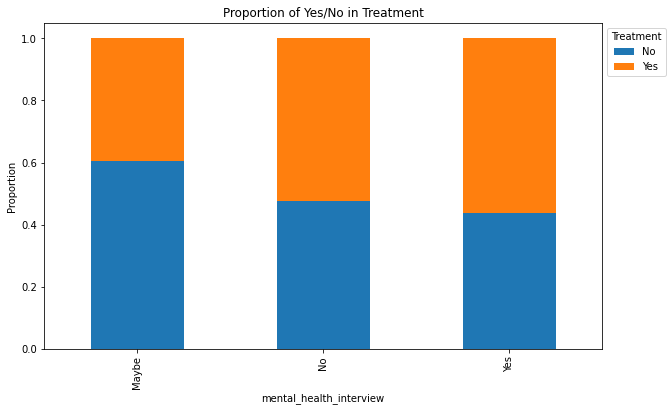

In [81]:
visualize(df, 'mental_health_interview')

Frequency of each value:
 Maybe    555
No       496
Yes      200
Name: phys_health_interview, dtype: int64
Number of null values: 0


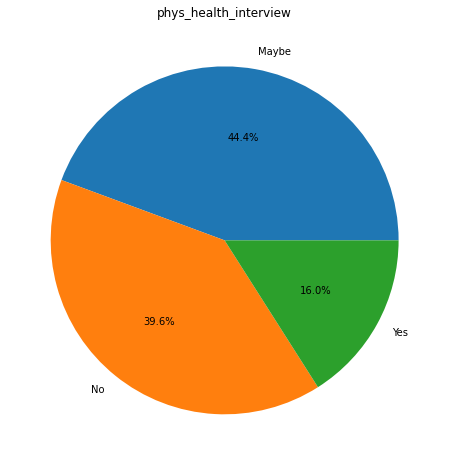

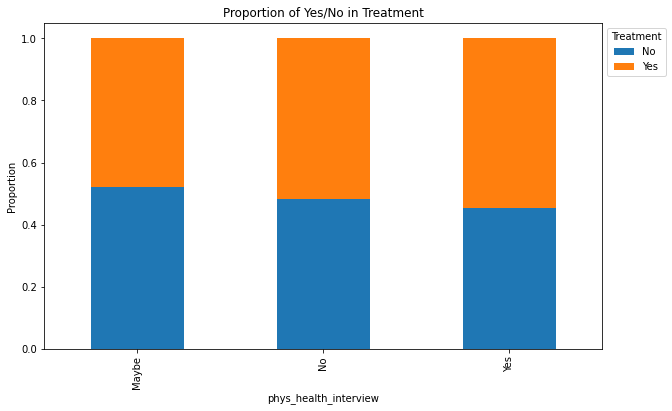

In [82]:
visualize(df, 'phys_health_interview')

Frequency of each value:
 Don't know    574
No            338
Yes           339
Name: mental_vs_physical, dtype: int64
Number of null values: 0


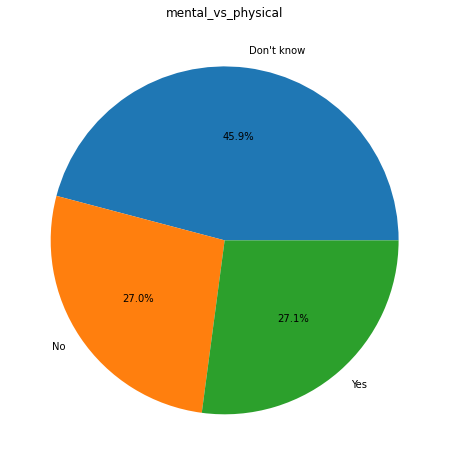

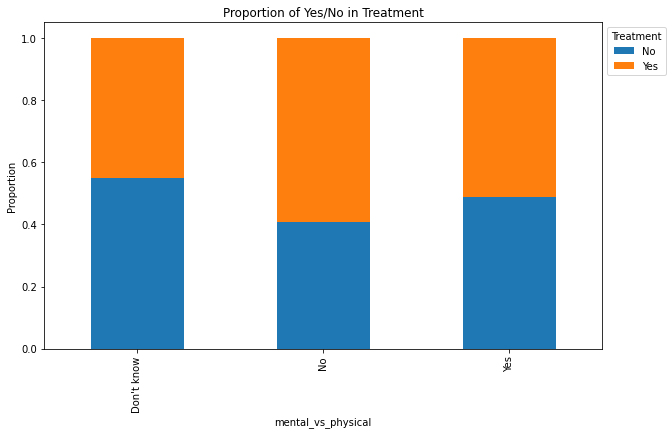

In [83]:
visualize(df, 'mental_vs_physical')

Frequency of each value:
 No     1070
Yes     181
Name: obs_consequence, dtype: int64
Number of null values: 0


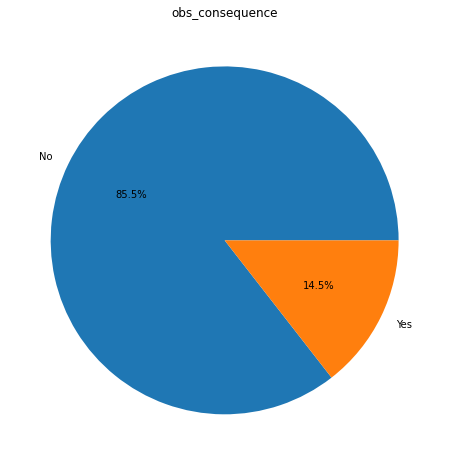

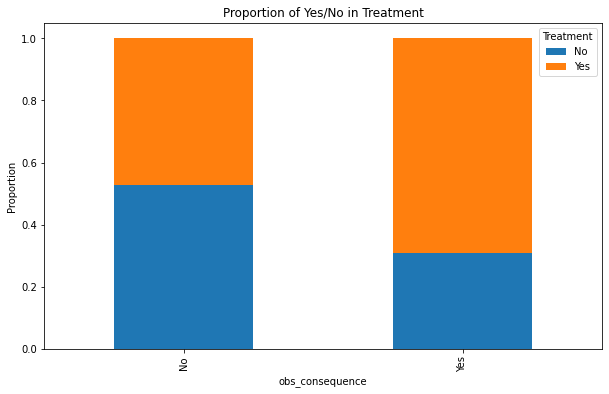

In [84]:
visualize(df, 'obs_consequence')

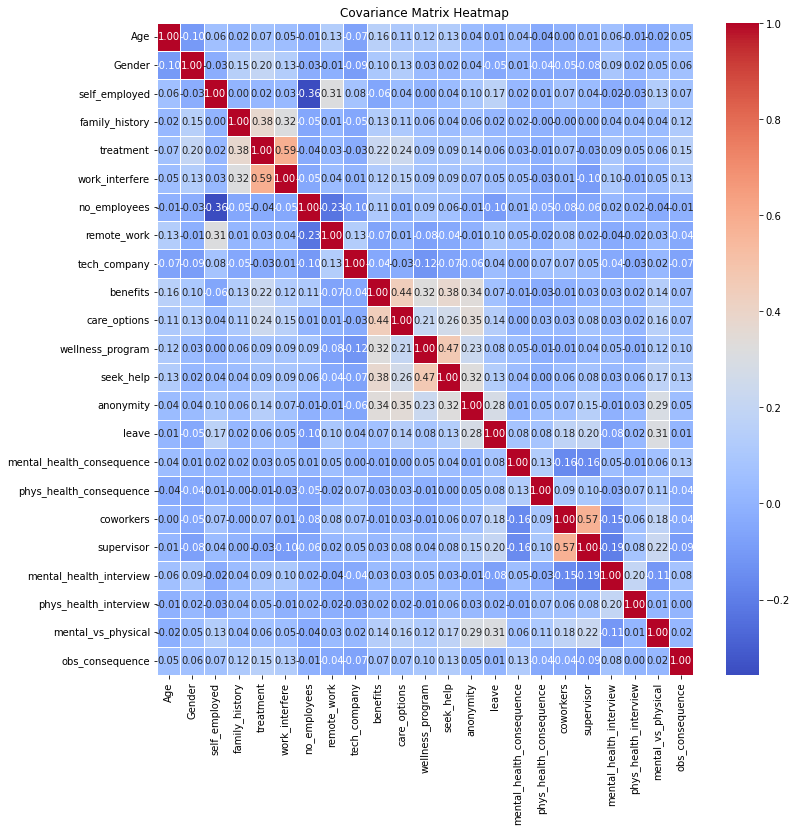

In [85]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
dfe = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
dfs = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)
cov_matrix = dfs.cov()
plt.figure(figsize=(12, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [86]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Age: [3 2 1 0]
Unique values in Gender: [1 0 2]
Unique values in self_employed: ['No' 'Yes']
Unique values in family_history: ['No' 'Yes']
Unique values in treatment: ['Yes' 'No']
Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes']
Unique values in no_employees: ['6-25' 'More than 1000' '26-100' '100-1000' '1-5']
Unique values in remote_work: ['No' 'Yes']
Unique values in tech_company: ['Yes' 'No']
Unique values in benefits: ['Yes' "Don't know" 'No']
Unique values in care_options: ['Not sure' 'No' 'Yes']
Unique values in wellness_program: ['No' "Don't know" 'Yes']
Unique values in seek_help: ['Yes' "Don't know" 'No']
Unique values in anonymity: ['Yes' "Don't know" 'No']
Unique values in leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
Unique values in mental_health_consequence: ['No' 'Maybe' 'Yes']
Unique values in phys_health_consequence: ['No' 'Yes' 'Maybe']
Unique values in coworkers: ['Some of them' 'No' '

In [39]:
df['comprehensive_care'] = df['benefits'].astype(str) + '_' + df['care_options'].astype(str) 
df['comprehensive_support'] = df['wellness_program'].astype(str) + '_' + df['seek_help'].astype(str)

Frequency of each value:
 Don't know_No          204
Don't know_Not sure    197
Don't know_Yes           6
No_No                  204
No_Not sure             24
No_Yes                 143
Yes_No                  91
Yes_Not sure            92
Yes_Yes                290
Name: comprehensive_care, dtype: int64
Number of null values: 0


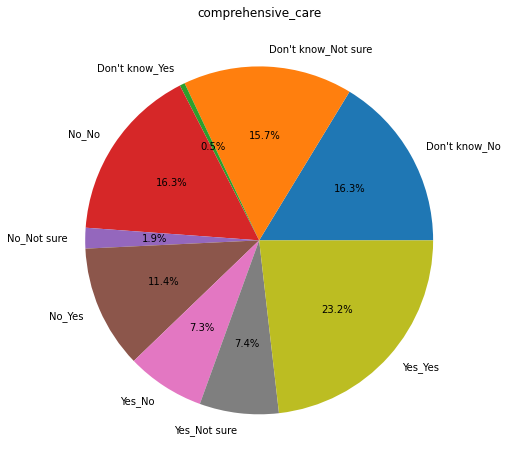

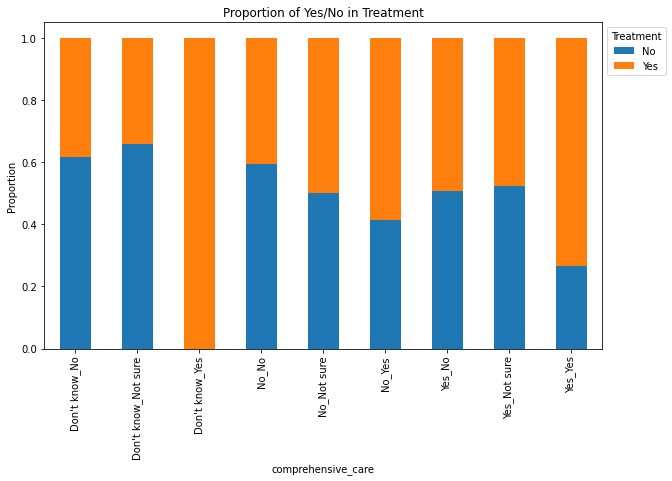

In [40]:
visualize(df, 'comprehensive_care')

Frequency of each value:
 Don't know_Don't know    138
Don't know_No             21
Don't know_Yes            28
No_Don't know            185
No_No                    592
No_Yes                    60
Yes_Don't know            40
Yes_No                    28
Yes_Yes                  159
Name: comprehensive_support, dtype: int64
Number of null values: 0


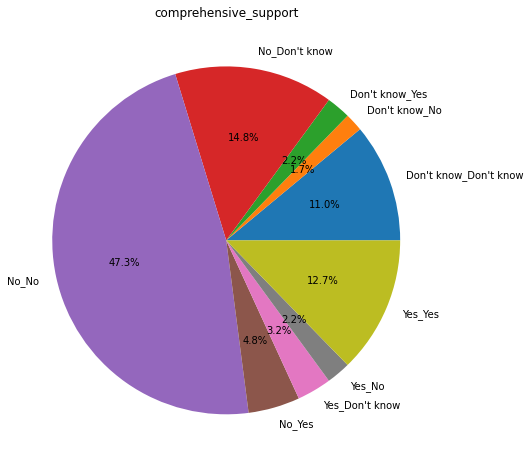

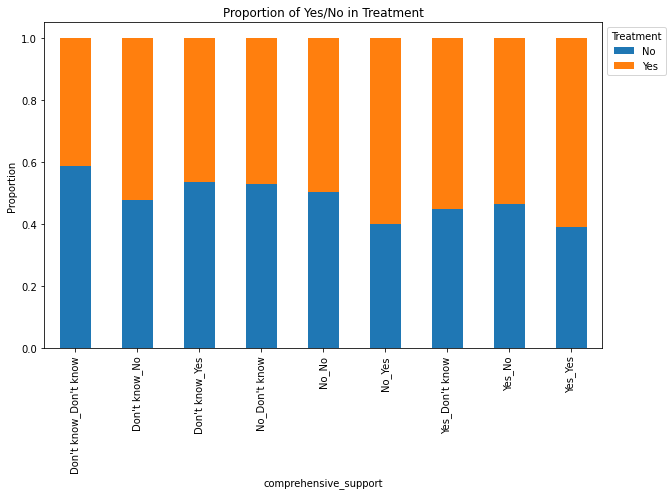

In [41]:
visualize(df, 'comprehensive_support')

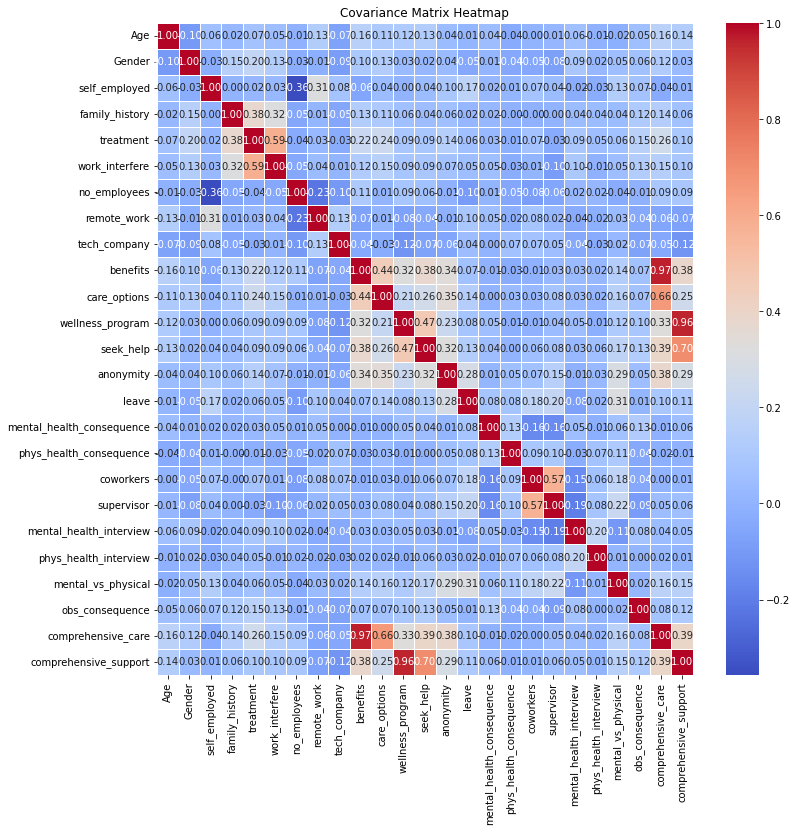

In [42]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
dfe = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
dfs = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)
cov_matrix = dfs.cov()
plt.figure(figsize=(12, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [43]:
df=df.drop(['benefits', 'care_options', 'wellness_program', 'seek_help'], axis=1)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,anonymity,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comprehensive_care,comprehensive_support
0,3,1,No,No,Yes,Often,6-25,No,Yes,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,Yes_Not sure,No_Yes
1,3,0,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Maybe,No,No,No,No,No,Don't know,No,Don't know_No,Don't know_Don't know
2,2,0,No,No,No,Rarely,6-25,No,Yes,Don't know,...,No,No,Yes,Yes,Yes,Yes,No,No,No_No,No_No
3,1,0,No,Yes,Yes,Often,26-100,No,Yes,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No_Yes,No_No
4,1,0,No,No,No,Never,100-1000,Yes,Yes,Don't know,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Yes_No,Don't know_Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,No,No,Yes,Never,26-100,No,Yes,Don't know,...,No,No,Some of them,Some of them,No,No,Don't know,No,No_No,No_No
1255,2,0,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,Yes_Yes,No_No
1256,2,0,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Don't know,...,Yes,Yes,No,No,No,No,No,No,Yes_Yes,No_No
1257,3,1,No,No,No,Never,100-1000,Yes,Yes,Don't know,...,Yes,No,No,No,No,No,No,No,No_Yes,No_No


In [44]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Age: [3 2 1 0]
Unique values in Gender: [1 0 2]
Unique values in self_employed: ['No' 'Yes']
Unique values in family_history: ['No' 'Yes']
Unique values in treatment: ['Yes' 'No']
Unique values in work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes']
Unique values in no_employees: ['6-25' 'More than 1000' '26-100' '100-1000' '1-5']
Unique values in remote_work: ['No' 'Yes']
Unique values in tech_company: ['Yes' 'No']
Unique values in anonymity: ['Yes' "Don't know" 'No']
Unique values in leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
Unique values in mental_health_consequence: ['No' 'Maybe' 'Yes']
Unique values in phys_health_consequence: ['No' 'Yes' 'Maybe']
Unique values in coworkers: ['Some of them' 'No' 'Yes']
Unique values in supervisor: ['Yes' 'No' 'Some of them']
Unique values in mental_health_interview: ['No' 'Yes' 'Maybe']
Unique values in phys_health_interview: ['Maybe' 'No' 'Yes']
Unique values in mental_vs_physical:

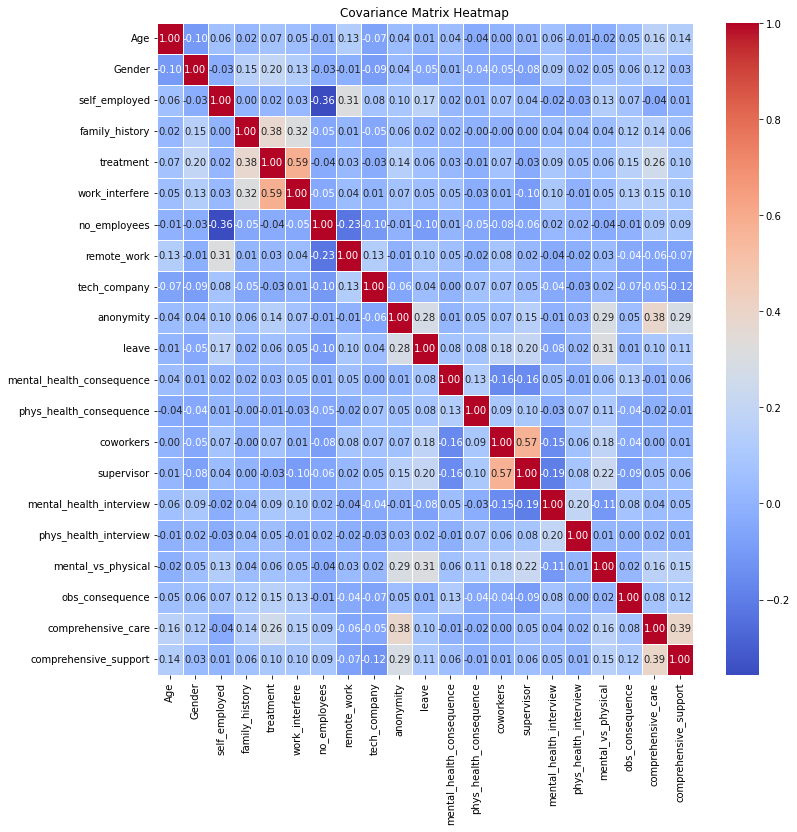

In [454]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
dfe = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
dfs = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)
cov_matrix = dfs.cov()
plt.figure(figsize=(12, 12))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [455]:
dfe.to_csv("UpdatedSurvey.csv")

In [47]:
for column in dfe.columns:
    print(column)

Age
Gender
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
comprehensive_care
comprehensive_support
